In [1]:
library(Seurat)
library(SeuratData)
library(patchwork)
library(glmGamPoi)
library(ggplot2) #for plot saving
library(SeuratDisk)
library(Matrix)
library(cowplot)
library(tidyverse)

Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used

### Variable inputs

In [2]:
tissue <- "WA"

In [3]:
#name of reference file
if (tissue == "AO"){
    refname <- "Heart_and_Aorta" 
} else if (tissue == "MO"){ 
    refname <- "Spleen"
} else if (tissue == "WA"){ 
    refname <- "Fat"
}

### Loading data

In [4]:
#load datasets as Seurat objects

reference <- readRDS(file = paste0("integration-input/reference/droplet.normalized.",refname,".subset.rds"))

# NB! query is assumed to be SCTransformed and integrated 
query <- readRDS(file = paste0("integration-input/",tissue,"/",tissue,"_all.rds"))

In [5]:
DefaultAssay(query) <-"integrated"
#DefaultAssay(reference) <-"RNA"

In [6]:
datasets.list=list(reference,query)

In [7]:
datasets.list

[[1]]
An object of class Seurat 
20138 features across 2509 samples within 1 assay 
Active assay: RNA (20138 features, 0 variable features)

[[2]]
An object of class Seurat 
32713 features across 13392 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap


In [8]:
rm(query)
rm(reference)

## Dataset preprocessing

In [10]:
# Scale data for reference
datasets.list[[1]] <- ScaleData(datasets.list[[1]])
# Correct reference data with SCTransform
datasets.list[[1]] <- SCTransform(datasets.list[[1]],  method = "glmGamPoi", verbose = FALSE)
# find variable features
datasets.list[[1]] <- FindVariableFeatures(datasets.list[[1]],nfeatures = 3000, verbose = TRUE) 

Centering and scaling data matrix



In [11]:
# Dimensional reductions and clustering
datasets.list <- lapply(X = datasets.list, FUN = function(x) {
    x <- RunPCA(x, verbose = FALSE)
    x <- FindNeighbors(object = x, reduction = "pca")

    x <- FindClusters(object = x, 
                               n.iter = 20,
                               n.start = 20,
                               resolution = 2) # run at higher resolution than default (0.8) to be able to more easily assign clusters into cell types

    x <- RunTSNE(object = x, reduction = "pca")
    x <- RunUMAP(x, reduction = "pca", dims = 1:30)
})

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2509
Number of edges: 70687

Running Louvain algorithm...
Maximum modularity in 20 random starts: 0.8334
Number of communities: 24
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:07:11 UMAP embedding parameters a = 0.9922 b = 1.112

11:07:11 Read 2509 rows and found 30 numeric columns

11:07:11 Using Annoy for neighbor search, n_neighbors = 30

11:07:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:07:11 Writing NN index file to temp file /tmp/RtmplbR1Tw/file175e6a65771a

11:07:11 Searching Annoy index using 1 thread, search_k = 3000

11:07:12 Annoy recall = 100%

11:07:12 Commencing smooth kNN distance calibration using 1 thread

11:07:13 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13392
Number of edges: 429843

Running Louvain algorithm...
Maximum modularity in 20 random starts: 0.8005
Number of communities: 31
Elapsed time: 3 seconds


11:08:38 UMAP embedding parameters a = 0.9922 b = 1.112

11:08:38 Read 13392 rows and found 30 numeric columns

11:08:38 Using Annoy for neighbor search, n_neighbors = 30

11:08:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:08:40 Writing NN index file to temp file /tmp/RtmplbR1Tw/file175e20428154

11:08:40 Searching Annoy index using 1 thread, search_k = 3000

11:08:44 Annoy recall = 100%

11:08:45 Commencing smooth kNN distance calibration using 1 thread

11:08:46 Initializing from normalized Laplacian + noise

11:08:47 Commencing optimization for 200 epochs, with 581958 positive edges

11:08:55 Optimization finished



# plots

In [12]:
# run FindAllMarkers
# (this will take several minutes to run with the selected - default - settings)
query.markers <- FindAllMarkers(object = datasets.list[[2]], 
                                         test.use = "wilcox", # wilcox is the default
                                         min.pct = 0.1, # 0.1 is the default
                                         logfc.threshold = 0.25, # 0.25 is the default
                                         only.pos = F) # FALSE is the default
                                          # assay="RNA"

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30



In [13]:
# DoHeatmap - heatmap of cluster marker genes to facilitate cell type annotation work
top15 <- query.markers %>% group_by(cluster) %>% top_n(n = 15, avg_log2FC)

png(filename =paste0("integration-output/",tissue,"/cluster_markers_heatmap_logFC_top15.png"), width = 1500, height = 1500)
print(DoHeatmap(object = datasets.list[[2]], features = top15$gene) + NoLegend())
dev.off()

# make a pdf heatmap as well, so that gene names are searchable
pdf(file = paste0("integration-output/",tissue,"/cluster_markers_heatmap_logFC_top15.pdf"), width=25, height=25)
print(DoHeatmap(object = datasets.list[[2]], features = top15$gene) + NoLegend())
dev.off()

png 
  2

png 
  2

## Label transfer

In [15]:
# downsample to limit cluster sizes to 500 cells
# this will help with the anchor finding step that wants to allocate a large amount of memory
datasets.list[[1]] <- subset(x = datasets.list[[1]], downsample = 500)

In [16]:
intfeatures <- SelectIntegrationFeatures(
  datasets.list,
  nfeatures = 3000,
  verbose = TRUE
)

In [17]:
# find anchors in the query
datasets.anchors <- FindTransferAnchors(reference = datasets.list[[1]], 
                                              query = datasets.list[[2]], 
                                              #dims = 1:75, # Which dimensions to use from the reduction to specify the neighbor search space 
                                              # default 1:30, 
                                              # maybe 1:75 -- reference (MCA) did have important pc-s up to pc 75
                                              npcs = NULL, # If null, then use an existing PCA structure in the reference object
                                              features = intfeatures, 
                                              # "features" might be unnecessary if npcs=NULL
                                              normalization.method = "SCT",
                                              reference.reduction = "pca",
                                              eps = 0, # default 0; employ an approximate nearest neighbor search by increasing the nn.eps parameter. 
                                              # Setting this at 0 (the default) represents an exact neighbor search. 
                                              # could also set to 0.5 (might speed up the calculation)
                                              k.anchor = 5, # default: 5; How many neighbors (k) to use when picking anchors
                                              k.score = 30, # default 30; How many neighbors (k) to use when scoring anchors
                                              k.filter = 200, # default: 200; How many neighbors (k) to use when filtering anchors
                                              max.features = 200, # default: 200; The maximum number of features to use when specifying the neighborhood search space in the anchor filtering
                                              verbose = TRUE)


Normalizing query using reference SCT model

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 2169 anchors



In [19]:
# After finding anchors, we use the TransferData function to classify the query
# cells based on reference data (a vector of reference cell type labels).
# TransferData returns a matrix with predicted IDs and prediction scores, which
# we can add to the query metadata.

# predict based on cell_ontology_class
datasets.predictions <- TransferData(anchorset = datasets.anchors, 
                                           refdata = datasets.list[[1]]$cell_ontology_class, 
                                           #dims = 1:75
                                            )

# add the predictedID-s and their corresponding prediction scores 
datasets.list[[2]] <- AddMetaData(object = datasets.list[[2]], 
                              metadata = datasets.predictions[,c("predicted.id", "prediction.score.max")])


Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [20]:
# if there are empty IDs (cells that were unnamed in the atlas) then replace these IDs to be non-empty
summary(datasets.list[[2]]$predicted.id=="")
datasets.list[[2]][["predicted.id"]] <- replace(datasets.list[[2]]$predicted.id, 
                                            datasets.list[[2]]$predicted.id=="", 
                                            "NotNamedInAtlas")


   Mode   FALSE 
logical   13392 

Saving 6.67 x 6.67 in image



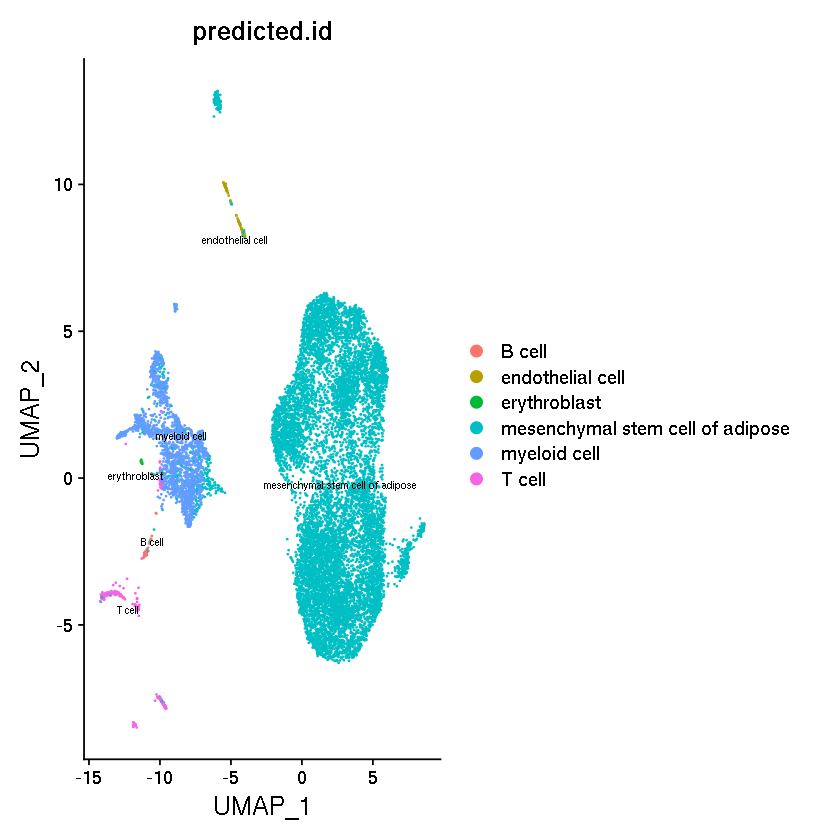

In [22]:
# check the predicted ID-s:
p1 = DimPlot(datasets.list[[2]], reduction = "umap", group.by = "predicted.id", label = TRUE, label.size = 2, repel = TRUE) 
p1
ggsave(paste0("integration-output/",tissue,"/",tissue,"predictedid_umap.png"))

In [23]:
# check the predicted ID-s:
table(datasets.list[[2]]$predicted.id)



                          B cell                 endothelial cell 
                              75                              112 
                    erythroblast mesenchymal stem cell of adipose 
                              11                            10924 
                    myeloid cell                           T cell 
                            1929                              341 

In [24]:
# write the cell type counts to have it recorded
write.table(table(datasets.list[[2]]$predicted.id), 
            file=paste0("integration-output/",tissue,"/predictedID-s_from_Tabula_Muris_SCT.txt"),
            quote=F, col.names = F, row.names = F)

In [25]:
# write all the prediction scores to have it recorded
write.table(datasets.predictions, 
            file=paste0("integration-output/",tissue,"/cell_type_prediction_scores_full_table_SCT.txt"),
            quote=F, col.names = T, row.names = T, sep="\t")

In [27]:
# store the predicted ID-s under a more descriptive name
datasets.list[[2]][["celltype.pred"]] <- datasets.list[[2]]$predicted.id



# make a tSNE plot showing the predicted cell types and cell counts

# Calculate number of cells per ID
cell.num <- table(datasets.list[[2]]$celltype.pred)

# Add cell number per cluster to cluster labels
predictedIDAndCount <- paste(names(cell.num), paste0("(n = ", cell.num, ")"))
names(x = predictedIDAndCount) <- names(cell.num)

# set the predicted cell type as the active ident
Idents(object = datasets.list[[2]]) <- datasets.list[[2]]$predicted.id

# add the cell counts into the idents:
datasets.list[[2]] <- RenameIdents(object = datasets.list[[2]], predictedIDAndCount)

# make the plot
png(filename = paste0("integration-output/",tissue,"/RNA_-_tSNE_-_predicted_cell_types_and_counts_SCT.png"), width=1200, height=750)
print(DimPlot(object = datasets.list[[2]], reduction = "tsne", pt.size = 0.5, label = T, 
              label.size=4, repel=T) + labs(title = "cell types predicted from Tabula Muris"))
dev.off()

# set the idents back to cluster ID number:
##### NEED TO CHANGE TO THE CORRECT RESOLUTION FOR EACH TISSUE
Idents(datasets.list[[2]]) <- "RNA_snn_res.2" # make sure to use idents from the same resolution as previously


### end of cell type identity prediction using the Tabula Muris SmartSeq2 mouse cell atlas

png 
  2

In [28]:
datasets.list[[2]]$predicted.id <- NULL

In [21]:
saveRDS(datasets.list, file = paste0("integration-output/",tissue,"/",tissue,"_transferred.rds"))

In [31]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [32]:
exportdata <- as.data.frame(as.matrix(datasets.list[[2]]@meta.data))
fwrite(x = exportdata, file =paste0("integration-output/",tissue,"/",tissue,"_metadata.csv"), row.names = TRUE)